### Make Classification data and get it ready

In [40]:
import sklearn
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, random_state=42, noise=0.03)
len(X), len(y)

(1000, 1000)

In [42]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [43]:
# Make Dataframe of circles Data

circles = pd.DataFrame({"X1" : X[:, 0], "X2" : X[:, 1], "label" : y})
circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


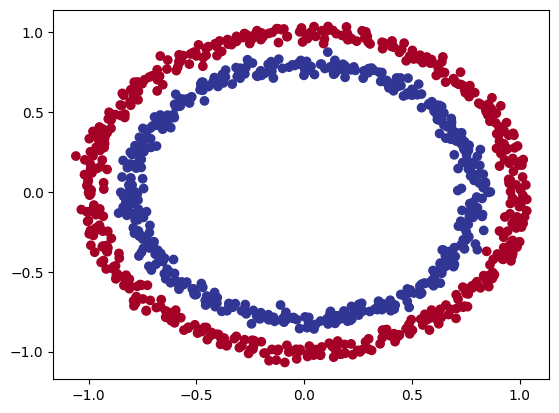

In [44]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

Note: the data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### Check input and Output Shapes

In [45]:
X.shape, y.shape

((1000, 2), (1000,))

###1.2 Turn Data into tensors and create train and test Splits

In [46]:
type(X), type(y), X.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'))

In [47]:
#Convert Numpy array to tensors

X = torch.from_numpy(X).type(torch.float) # To Convert numpy default type float64 to tensors default type float32
y = torch.from_numpy(y).type(torch.float)

X[: 5], y[: 5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [48]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [49]:
#Split the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)  # test_size = 0.2 = 20% of data will be test & 80% will be train
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Building a model

Let's build a model to classify out blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelator(GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Creat a training and test loop

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [51]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses nn.Module (almost all models in Pytorch subclass nn.Module)
2. create 2 nn.Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() methos that outlines the forward pass(or forward compuatation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [52]:
#1. Construct a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__();
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.tensor):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output


#4. Instantiate an instance of our model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [53]:
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

In [54]:
next(model_0.parameters()).device

device(type='cpu')

In [55]:
#Let's repicate the above model using nn.Sequential()
model_v1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_v1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [56]:
#Also nn.sequential can be incorported as below

class CircleClassificationv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.twolayersequential = nn.Sequential( nn.Linear(in_features=2, out_features=5), nn.Linear(in_features=5, out_features=1))

  def forward(self, x):
    return self.twolayersequential(x)

model_V2 = CircleClassificationv1().to(device)
model_V2

CircleClassificationv1(
  (twolayersequential): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [57]:
model_v1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [58]:
# Make Predictions

with torch.inference_mode():
  untrained_preds = model_v1(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of Test Sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 Predictions: \n{untrained_preds[:10]}")
print(f"\n First 10 Labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of Test Sample: 200, Shape: torch.Size([200, 2])

 First 10 Predictions: 
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

 First 10 Labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entrophy or categorical cross entropy(cross entropy).

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options

For Loss Function we are going to use nn.BCEWithLogitsLoss()



In [59]:
#Setup the loss function
# loss_fn = nn.BCELoss() --> BCELoss requires inputs to have gone through the sigmoid activation function prior to input to BCEloss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has sigmoid activation fucntion Built-in

optimizer = torch.optim.SGD(params = model_v1.parameters(), lr = 0.1)



### Defining Evalutaion Metrics Accuracy

In [30]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_true)) * 100
  return acc

### 3. Train Model.

1. model. train()
2. calculate the loss
3. optimizer ZeroGrad
4. loss Backward (Backpropagation)
5. optimizer step (Gradient Descent)

### 3.1 going from raw logits --> prediction probabilities --> prediction labels

Our Model outputs are going to be raw **logits**

We can **convert these logits into prediction probabilities** by passinng them to some kind of activation fucntion (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's **prediction probabilities** to prediction labels by either rounding them or taking the argmax()

In [61]:
#View the first 5 outputs of the forward pass on the test data

model_v1.eval()
with torch.inference_mode():
     y_logits = model_v1(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [62]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [63]:
#Use the sigmoid function on our model logits to turn them to prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs



tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [64]:
y_preds = torch.round(y_pred_probs)

#Infull
y_pred_labels = torch.round(torch.sigmoid(model_v1(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds

tensor([True, True, True, True, True])


tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

### Building a training and testing loop

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) # if we are doing operations on Cude device

#Setthe number of epochs
epochs = 100

#put data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):

  ## Training
  model_v1.train()

  # 1. Forward Pass
  y_logits = model_v1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. calculate Loss / Accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), y_train) --> BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train)  #BCEWithLogitsLoss Expects raw logits as input
  accuracy = accuracy_fn(y_true = y_train, y_pred=y_preds)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Loss Backward (backpropagation)
  loss.backward()

  # 5. Optimizer Step (Gradientdescent)
  optimizer.step()

  ## Testing
  model_v1.eval()
  with torch.inference_mode():

    #1. Forward Pass
    y_test_logits = model_v1(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    #2. Calculate test loss/accuracy
    test_loss = loss_fn(y_test_logits, y_test)
    test_accuracy = accuracy_fn(y_true= y_test, y_pred= y_test_preds)

  # Printout what's happening
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | train loss: {loss: .5f} , Acc: {accuracy : .2f} | test loss: {test_loss}, acc: {test_accuracy : .2f}")


epoch: 0 | train loss:  0.69796 , Acc:  51.88 | test loss: 0.6943961977958679, acc:  58.00
epoch: 10 | train loss:  0.69590 , Acc:  51.25 | test loss: 0.6930528283119202, acc:  53.00
epoch: 20 | train loss:  0.69490 , Acc:  51.62 | test loss: 0.692543625831604, acc:  49.50
epoch: 30 | train loss:  0.69435 , Acc:  51.12 | test loss: 0.6923599243164062, acc:  49.50
epoch: 40 | train loss:  0.69401 , Acc:  50.88 | test loss: 0.6923156976699829, acc:  51.00
epoch: 50 | train loss:  0.69378 , Acc:  50.25 | test loss: 0.6923369765281677, acc:  50.00
epoch: 60 | train loss:  0.69362 , Acc:  50.00 | test loss: 0.6923913359642029, acc:  51.50
epoch: 70 | train loss:  0.69351 , Acc:  50.25 | test loss: 0.6924623847007751, acc:  51.00
epoch: 80 | train loss:  0.69342 , Acc:  49.88 | test loss: 0.6925414800643921, acc:  50.00
epoch: 90 | train loss:  0.69336 , Acc:  49.88 | test loss: 0.692623496055603, acc:  53.00


### 4. Make Predictions and Evaluate the model

From the metrics it looks like our model isn't learning anything....

So to inspect it let's make some predictions and make them visual!

To do so, we're going to import a function called plot_decision_boundary from internet: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [88]:
import requests
from pathlib import Path

#Download helper functions from github repo if it's not already downloaded

if Path("helper_functions.py").is_file():
  print("helper_function.py alreadt exists, Skipping download")
else:
  print("Downloading helper functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

### Plot the decison Boundaries

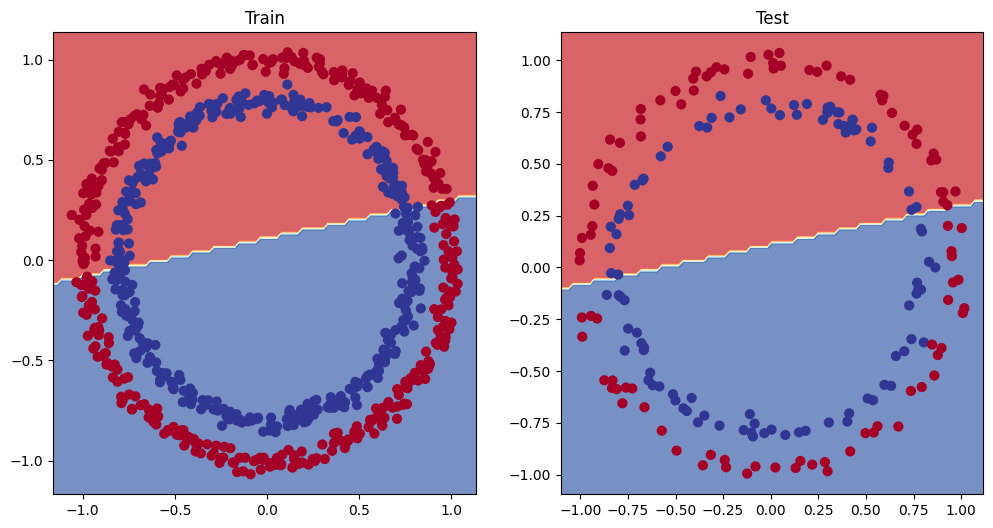

In [67]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_v1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_v1, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add More layers - give the model more chances to learn about patterns in the data
* Add more hidden Units - go from 5 hidden units to 10 hidden units
* Fit for longer - Increase the epochs
* Changing the Activation Function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values that Machine learning engineers and data scientists can change, they are referred as **Hyperparameters**

Let's try and improve our model by:

* Adding more hidden units: 5 --> 10
* Increase the number of layers: 2 --> 3
* Increase the number of epochs: 100 --> 1000

All of these will not be updated at the same time as we don't know what actually improved or degraded our model performance. in real time, we do one change at a time and track the results [we call that as **Experiment tracking**]

In [68]:
class CircleModelUpdated(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x))) # This way of writing operations levarages speed ups where possible behind the scenes

model_new_V1 = CircleModelUpdated()
model_new_V1


CircleModelUpdated(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [69]:
#Create a loss Function
loss_fn = nn.BCEWithLogitsLoss()

#Create an Optimizer
optimizer = torch.optim.SGD(params = model_new_V1.parameters(), lr = 0.01)

In [70]:
epochs = 1000

for epoch in range(epochs):

  model_new_V1.train()
  y_logits = model_new_V1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred= y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_new_V1.eval()
  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_new_V1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2. Calculate Loss
      test_loss = loss_fn(test_logits, y_test)
      test_accuracy = accuracy_fn(y_pred = test_pred,y_true = y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss: .5f}, Test_acc: {test_accuracy: .2f}")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss:  0.69261, Test_acc:  51.00
Epoch: 100 | Loss: 0.69369, Acc: 50.25% | Test Loss:  0.69269, Test_acc:  50.00
Epoch: 200 | Loss: 0.69351, Acc: 50.12% | Test Loss:  0.69282, Test_acc:  49.50
Epoch: 300 | Loss: 0.69339, Acc: 50.50% | Test Loss:  0.69295, Test_acc:  49.00
Epoch: 400 | Loss: 0.69329, Acc: 50.38% | Test Loss:  0.69309, Test_acc:  48.50
Epoch: 500 | Loss: 0.69322, Acc: 49.88% | Test Loss:  0.69322, Test_acc:  49.50
Epoch: 600 | Loss: 0.69317, Acc: 49.50% | Test Loss:  0.69335, Test_acc:  53.00
Epoch: 700 | Loss: 0.69313, Acc: 49.38% | Test Loss:  0.69347, Test_acc:  50.50
Epoch: 800 | Loss: 0.69309, Acc: 50.00% | Test Loss:  0.69358, Test_acc:  51.00
Epoch: 900 | Loss: 0.69307, Acc: 50.62% | Test Loss:  0.69368, Test_acc:  47.50


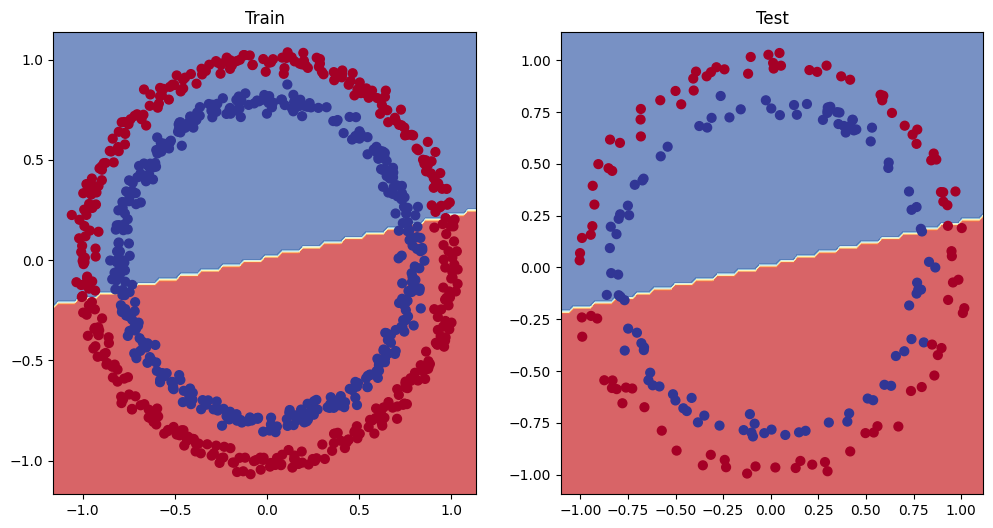

In [71]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_new_V1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_new_V1, X_test, y_test)

### The missing Piece: Non_linearity

What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?

or in machine Learning terms, an infinite(but really it is finite) of linear and non-linear functions?

### Recreating Non-linear data

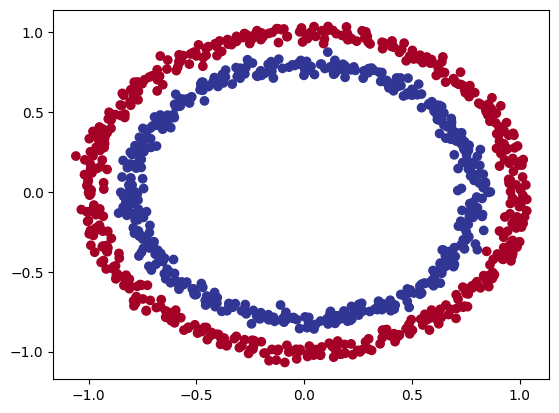

In [72]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples= 1000, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu)
plt.show()

In [73]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into Train and test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a Model with Non_linearity

* Linear = Straight lines
* Non-Linear = non-straight Lines

Artificial nueral networks is a large combination of linear (Straight) and Non-Straigh(non-linear) functions which are potentially able to find patterns in data.

In [74]:
class NonLinearCircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

modelNonLinear = NonLinearCircleModel()
modelNonLinear

NonLinearCircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [75]:
# Setup loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= modelNonLinear.parameters(), lr = 0.1)

In [76]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Training a Model with Non-linearity

In [77]:
#random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Put all the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
    modelNonLinear.train()

    y_pred_logits = modelNonLinear(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_pred_logits))

    loss = loss_fn(y_pred_logits, y_train)
    acc= accuracy_fn(y_true = y_train, y_pred = y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    with torch.inference_mode():
      y_test_logits = modelNonLinear(X_test).squeeze()
      y_test_preds = torch.round(torch.sigmoid(y_test_logits))

      test_loss = loss_fn(y_test_logits, y_test)
      test_acc = accuracy_fn(y_true= y_test, y_pred = y_test_preds)

    if epoch % 100 == 0:
      print(f"epoch: {epoch} | Loss: {loss:.4f} , acc: {acc:.2f} | Test_Loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}")


epoch: 0 | Loss: 0.6944 , acc: 50.00 | Test_Loss: 0.6936, Test_acc: 50.00
epoch: 100 | Loss: 0.6916 , acc: 55.12 | Test_Loss: 0.6905, Test_acc: 52.50
epoch: 200 | Loss: 0.6907 , acc: 50.88 | Test_Loss: 0.6892, Test_acc: 54.00
epoch: 300 | Loss: 0.6898 , acc: 51.38 | Test_Loss: 0.6877, Test_acc: 56.00
epoch: 400 | Loss: 0.6886 , acc: 51.38 | Test_Loss: 0.6861, Test_acc: 56.00
epoch: 500 | Loss: 0.6873 , acc: 52.00 | Test_Loss: 0.6844, Test_acc: 56.00
epoch: 600 | Loss: 0.6858 , acc: 54.75 | Test_Loss: 0.6825, Test_acc: 57.50
epoch: 700 | Loss: 0.6837 , acc: 59.75 | Test_Loss: 0.6803, Test_acc: 62.00
epoch: 800 | Loss: 0.6811 , acc: 56.75 | Test_Loss: 0.6777, Test_acc: 58.00
epoch: 900 | Loss: 0.6776 , acc: 58.63 | Test_Loss: 0.6746, Test_acc: 60.00
epoch: 1000 | Loss: 0.6730 , acc: 59.62 | Test_Loss: 0.6707, Test_acc: 59.50
epoch: 1100 | Loss: 0.6666 , acc: 61.12 | Test_Loss: 0.6654, Test_acc: 62.00
epoch: 1200 | Loss: 0.6559 , acc: 64.25 | Test_Loss: 0.6571, Test_acc: 65.00
epoch: 1300

### Evaluating a model trained with non-linear activation functions

In [82]:
#Make predictions

modelNonLinear.eval()

with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(modelNonLinear(X_test).squeeze()))

y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

#Plot Decision Boundaries

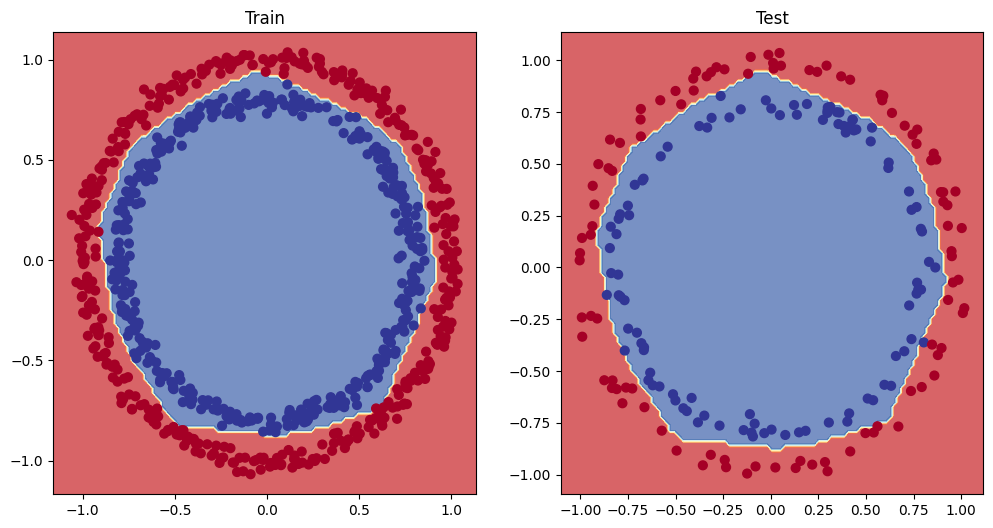

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(modelNonLinear, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(modelNonLinear, X_test, y_test)

### Replicating Non-linear Activation Functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & Non-linear functions

In [87]:
A = torch.arange(-10, 10, 1, dtype = torch.float)
A.dtype

torch.float32

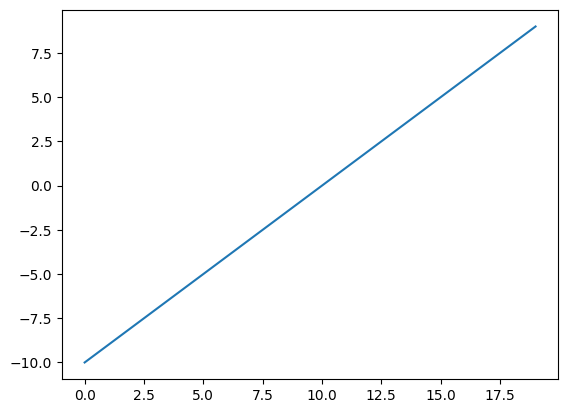

In [90]:
plt.plot(A)
plt.show()

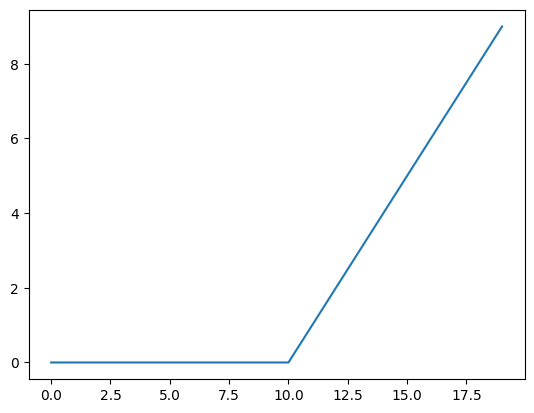

In [92]:
plt.plot(torch.relu(A))

In [93]:
def reluImp(x : torch.tensor) -> torch.tensor:
  return torch.max(torch.tensor(0), x) #input has to be tensor

reluImp(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

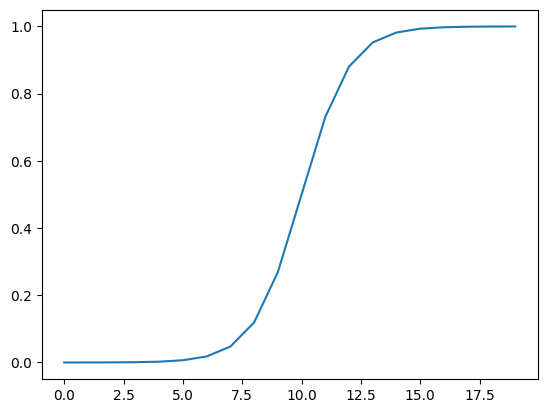

In [95]:
def sigmoidimpl(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoidimpl(A))
plt.show()

### Putting it all togeather with a multu-class classification problem

* Binary Classification = one thing or another (cat vs. Dog, Spam vs. not spam, fraud vs. not fraud
* Multi-class Classification = more than one thing or another (Cat vs. dog vs. Chicken

### Creating a toy multi-class dataset

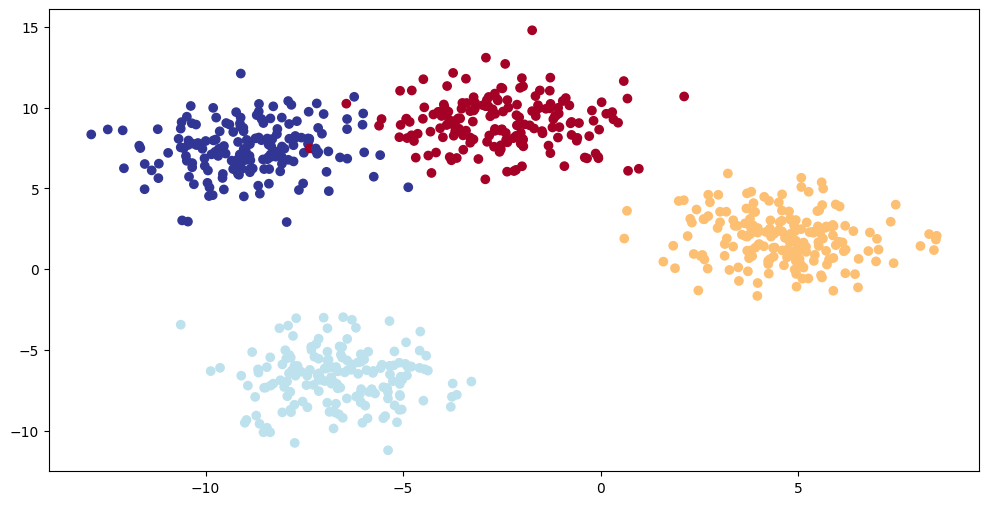

In [172]:
#Import dependencies
import torch
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000, n_features= NUM_FEATURES, centers=NUM_CLASSES, cluster_std = 1.5, random_state=RANDOM_SEED )

# As we are using sklearn and it levarages numpy we need to convert them to tensors
# Converting the numpy arrays to tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.3, random_state=RANDOM_SEED)


#plot the data
plt.figure(figsize= (12,6))
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap = plt.cm.RdYlBu)
plt.show()





### Building a Multi-class classification Model

In [173]:
# Create a device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [174]:
# Build a Multi-Class Classification Model
class BlobModel(nn.Module):
  def  __init__(self, input_features, output_features, hidden_units = 8):
    """
    initiliazes multi-class classification model.

    Args:
       input_features (int): Number on input features to the model.
       output_features (int): Number of output features (number of output classes)
       hidden units (int): Number of hidden units between layers, default: 8

    Returns:
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.Linear(in_features=hidden_units, out_features= output_features)
                                            )

  def forward(self, x):
    return self.linear_layer_stack(x)

MultiClassClassifierModel = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device);
MultiClassClassifierModel

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [175]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

### Create a Loss Function and Optimizer for Multi-Class Classification


In [176]:
loss_fn = nn.CrossEntropyLoss() # Loss Function measures how wrong our model's parameters are

optimizer = torch.optim.SGD(params = MultiClassClassifierModel.parameters(), lr = 0.1) # Optimizer updates our model parameters to try and reduce the loss

### Getting prediction probabilities for a multi-class pytorch model

In Order to evaluate, train and test pur model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw outpts of our model)--> Pred probs (torch.softmax) --> Prediction labels (torch.argmax)

In [177]:
#Let's get some raw outputs of our model (logits)
MultiClassClassifierModel.eval()
with torch.inference_mode():
  y_logits = MultiClassClassifierModel(X_train.to(device))

y_logits[:10]

tensor([[ 2.0485, -1.3388,  2.0864,  2.4484],
        [ 1.7572, -1.1796,  1.7881,  2.0973],
        [ 1.6753, -1.1971,  1.6953,  2.0456],
        [-0.4897, -1.4885, -0.7336,  0.5476],
        [ 2.1092,  0.1130,  2.3628,  1.4030],
        [-1.0388, -0.5041, -1.1969, -0.6295],
        [ 2.2829,  0.1122,  2.5541,  1.5413],
        [ 2.2479, -1.3913,  2.2986,  2.6461],
        [-1.0309, -0.7632, -1.2256, -0.4281],
        [-1.6411, -0.4963, -1.8598, -1.1132]])

In [178]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### Convert our model's logit outputs to prediction probabilities


In [179]:
y_pred_prob = torch.softmax(y_logits, dim =1)
y_pred_prob

tensor([[0.2806, 0.0095, 0.2914, 0.4185],
        [0.2866, 0.0152, 0.2956, 0.4027],
        [0.2837, 0.0160, 0.2894, 0.4108],
        ...,
        [0.2106, 0.0444, 0.1712, 0.5738],
        [0.3415, 0.0651, 0.4871, 0.1063],
        [0.3099, 0.0148, 0.3449, 0.3304]])

In [180]:
torch.sum(y_pred_prob[0])

tensor(1.)

In [181]:
torch.max(y_pred_prob[0])

tensor(0.4185)

In [182]:
torch.argmax(y_pred_prob[0])

tensor(3)

### Convert our Model's prediction probabilities to prediction labels

In [183]:
y_preds = torch.argmax(y_logits, dim =1)
y_preds

tensor([3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2,
        3, 1, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3,
        3, 1, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2,
        3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 2, 2, 3, 1, 3,
        1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2,
        3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 3, 1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 2, 3, 2,
        2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 2, 1, 3, 2, 3, 3, 3,
        3, 3, 3, 2, 3, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 2,
        1, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 2, 2, 1, 1, 3, 3, 3, 1, 2,
        3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3,

### Creating a Training and testing loop for a Multi-Class Pytorch Classification Model

In [184]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 100

for epoch in range(epochs):

  MultiClassClassifierModel.train()

  y_logits = MultiClassClassifierModel(X_train)
  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  MultiClassClassifierModel.eval()
  with torch.inference_mode():
    test_pred_logits = MultiClassClassifierModel(X_test)
    test_pred = torch.softmax(test_pred_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_pred_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"epoch: {epoch} | Loss:{loss:.4f} , Accuracy: {acc:.2f} | Test_loss : {test_loss:.4f}, test_acc: {test_acc:.2f}")




epoch: 0 | Loss:1.0459 , Accuracy: 65.29 | Test_loss : 0.5650, test_acc: 97.33
epoch: 10 | Loss:0.1459 , Accuracy: 99.14 | Test_loss : 0.1252, test_acc: 99.00
epoch: 20 | Loss:0.0821 , Accuracy: 99.14 | Test_loss : 0.0691, test_acc: 99.33
epoch: 30 | Loss:0.0607 , Accuracy: 99.14 | Test_loss : 0.0491, test_acc: 99.33
epoch: 40 | Loss:0.0504 , Accuracy: 99.14 | Test_loss : 0.0392, test_acc: 99.33
epoch: 50 | Loss:0.0444 , Accuracy: 99.14 | Test_loss : 0.0333, test_acc: 99.33
epoch: 60 | Loss:0.0406 , Accuracy: 99.14 | Test_loss : 0.0295, test_acc: 99.33
epoch: 70 | Loss:0.0379 , Accuracy: 99.29 | Test_loss : 0.0268, test_acc: 99.33
epoch: 80 | Loss:0.0360 , Accuracy: 99.29 | Test_loss : 0.0247, test_acc: 99.33
epoch: 90 | Loss:0.0345 , Accuracy: 99.29 | Test_loss : 0.0232, test_acc: 99.33


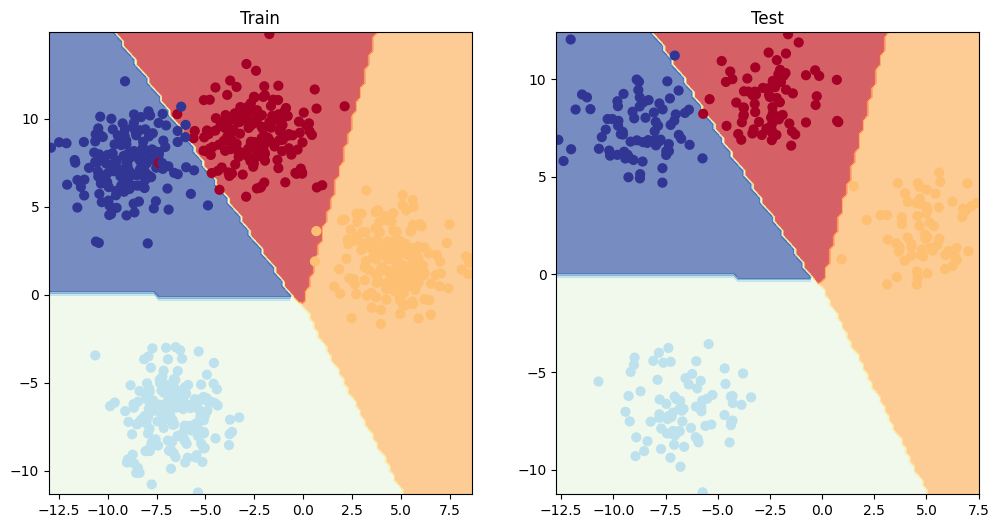

In [185]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(MultiClassClassifierModel, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(MultiClassClassifierModel, X_test, y_test)

### A few more Classification Metrics... (To Evaluate our classification Model)

* Accuracy - Out of 100 Samples, how many does our model get right? - Not best for imbalanced dataset
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report

PyTorch Metrics is a module in pytorch where we will get more metrics parameters

In [186]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 824.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [190]:
from torchmetrics import Accuracy

torchmetrics_summary = Accuracy(task= "multiclass", num_classes=4).to(device)

print(y_preds.shape)
print(y_test.shape)
torchmetrics_summary(y_preds, y_train)

torch.Size([700])
torch.Size([300])


tensor(0.9929)